In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Pre-processing

In [ ]:
 !pip install -qq -U mlxtend

     |████████████████████████████████| 1.3 MB 2.8 MB/s 


In [ ]:
import pandas as pd
import numpy
from numpy.random import randint
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer
from tqdm.auto import tqdm
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from networkx.algorithms.flow import shortest_augmenting_path
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
PORTER_STEMMER = PorterStemmer()

In [ ]:
def clean_tweets(x, STOPWORDS):
    # Lowercase
    sentence = x.lower()
    
    # Remove all non-alphabets (punctuation, numbers, new-line characters and extra-spaces)
    sentence = re.sub('http[s]?://\S+', '', sentence)
    sentence = re.sub(r'([^a-zA-Z ]+?)', '', sentence)
    #print(sentence)
    #sentence = sentence.replace('\n', '')
    # Remove URLs
    sentence = sentence.replace("world health organization", "who")
    #print(sentence)
    # Remove double spacing
    #sentence = re.sub('\s+', ' ', sentence)
    tokenized_tweet = [word for word in word_tokenize(sentence) if word not in STOPWORDS]
    tokenized_tweet = [PORTER_STEMMER.stem(word) for word in tokenized_tweet]
    return tokenized_tweet

<>:6: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \S
<ipython-input-5-e9114ee358bb>:6: DeprecationWarning: invalid escape sequence \S
  sentence = re.sub('http[s]?://\S+', '', sentence)


In [ ]:
pharma_username = ['pfizer']
#'JNJNews', 'AstraZeneca', 'GSK', 'Novartis'
public_username = ['CDCgov', 'IHSgov', 'GovCanHealth', 'GCIndigenous']
ngo_username = ['WHO']

In [ ]:

file1 = '/content/drive/MyDrive/Project 2/data/public_health_agencies/'+'CDCgov'+'.csv'
file2 = '/content/drive/MyDrive/Project 2/data/public_health_agencies/'+'IHSgov'+'.csv'
file3 = '/content/drive/MyDrive/Project 2/data/public_health_agencies/'+'GovCanHealth'+'.csv'
file4 = '/content/drive/MyDrive/Project 2/data/public_health_agencies/'+'GCIndigenous'+'.csv'
Sample_Tweets = pd.concat(
map(pd.read_csv, [file1, file2, file3, file4]), ignore_index=True)
print(Sample_Tweets)
# dataFrame.to_csv('/content/drive/MyDrive/Project 2/gephi/public_health_agencies/public_merged.csv')

                        id                 created_at      conversation_id  \
0      1542616744874967040  2022-06-30 21:11:07+00:00  1542616744874967040   
1      1542616268678758400  2022-06-30 21:09:13+00:00  1542616268678758400   
2      1542606417621913607  2022-06-30 20:30:04+00:00  1542606417621913607   
3      1542590047656067073  2022-06-30 19:25:01+00:00  1542590047656067073   
4      1542574696532787200  2022-06-30 18:24:01+00:00  1542574696532787200   
...                    ...                        ...                  ...   
65558  1215291794616999936  2020-01-09 15:18:37+00:00  1215291794616999936   
65559  1214286619458584577  2020-01-06 20:44:25+00:00  1214286619458584577   
65560  1213811169435291648  2020-01-05 13:15:08+00:00  1213811169435291648   
65561  1213086419318644736  2020-01-03 13:15:15+00:00  1213086419318644736   
65562  1212398550774165506  2020-01-01 15:41:54+00:00  1212398550774165506   

                                                   tweet  retwe

In [ ]:
Sample_Tweets = Sample_Tweets.sample(n=10)

In [ ]:
Sample_Tweets.iloc[0]

id                                                   1542616744874967040
created_at                                     2022-06-30 21:11:07+00:00
conversation_id                                      1542616744874967040
tweet                  Children receive smaller doses of the #COVID19...
retweet_count                                                          1
like_count                                                             7
reply_count                                                           15
quote_count                                                            0
expanded_url           https://twitter.com/CDCgov/status/154261674487...
language                                                              en
possibly_sensitive                                                 False
in_reply_to_user_id                                                  NaN
username                                                          CDCgov
Name: 0, dtype: object

In [ ]:
stopwords_df = set(nltk.corpus.stopwords.words("english"));
stopwords_df.add("rt")
stopwords_df.add("amp")
stopwords_df.add("get")
stopwords_df.add("It")
print(stopwords_df)

{'we', 'or', 'm', 'on', "it's", 'after', 'wouldn', 'you', 'during', 'mustn', 'have', 'up', 'she', 'your', "wasn't", 'only', 'll', 'just', 'itself', 'ours', 'having', 'should', 'most', "you'd", 'o', "hasn't", "you'll", 'herself', 'to', 'ourselves', 'not', 'can', 'my', 'hasn', 'me', 's', 've', 'such', 'its', 'him', 'where', "won't", 'for', 'ain', 'while', "aren't", 'there', 'doing', 'does', 'were', 'get', 'they', 'which', 't', 'as', 'd', "you're", 'had', 'y', 'those', "weren't", 'am', "didn't", 'how', 'with', 'i', 'be', 'each', 'our', 'her', 'aren', 'over', "mustn't", 'both', 'no', 'few', 'about', 'are', 'yourselves', "mightn't", 'It', 'has', 'doesn', 'it', 'yours', 'being', 'before', 'when', 'who', 'from', "that'll", 'down', 'won', 'of', 'again', 'now', 'wasn', 'needn', 'against', 're', "she's", 'than', 'a', 'all', 'through', 'their', 'these', 'do', 'out', 'further', 'own', 'an', 'under', 'once', "isn't", 'between', 'the', 'more', 'shouldn', "haven't", 'into', 'weren', 'rt', 'off', 'too

#Word Cloud

In [ ]:
df = None
Tweet_Texts=Sample_Tweets['tweet'].values

# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)

# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)

# Deleting any word which is less than 3-characters mostly those are stopwords
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

Tweet_Texts_Cleaned
# for username in pharma_username:

  # Sample_Tweets = pd.read_csv('/content/drive/MyDrive/Project 2/data/pharma_companies/'+username+'.csv')

  #only 10 rows
  # Sample_Tweets = Sample_Tweets[:10]
  
  #clean tweets
  # Extracting only the Tweet text from the data frame
  # Tweet_Texts=Sample_Tweets['tweet'].values

  # # Converting the text column as a single string for wordcloud
  # Tweets_String=str(Tweet_Texts)

  # # Tweet Text cleaning
  # import re

  # # Converting the whole text to lowercase
  # Tweet_Texts_Cleaned = Tweets_String.lower()

  # # Removing the twitter usernames from tweet string
  # Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

  # # Removing the URLS from the tweet string
  # Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


  # # Deleting everything which is not characters
  # Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)

  # # Deleting any word which is less than 3-characters mostly those are stopwords
  # Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', Tweet_Texts_Cleaned)

  # # Stripping extra spaces in the text
  # Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

  # Tweet_Texts_Cleaned

' children receive smaller doses the covid vaccine based their age like the adult vaccine the children vaccine helps keep them from getting seriously sick children and teens may get covid vaccines and other vaccines the same time you have questions talk your healthcare provider june million people have received least one dose covid vaccine those million are fully vaccinated more than million people have received covid booster dose nfind covid vaccine booster near you jordansprinciple can help firstnations children who need educational products services supports such teaching educational assistants find out more learn more about jordansprinciple announce the coming into force bill act respecting first nations inuit and tis children youth and famil '

In [ ]:
print(Tweet_Texts_Cleaned)

 children receive smaller doses the covid vaccine based their age like the adult vaccine the children vaccine helps keep them from getting seriously sick children and teens may get covid vaccines and other vaccines the same time you have questions talk your healthcare provider june million people have received least one dose covid vaccine those million are fully vaccinated more than million people have received covid booster dose nfind covid vaccine booster near you jordansprinciple can help firstnations children who need educational products services supports such teaching educational assistants find out more learn more about jordansprinciple announce the coming into force bill act respecting first nations inuit and tis children youth and famil 


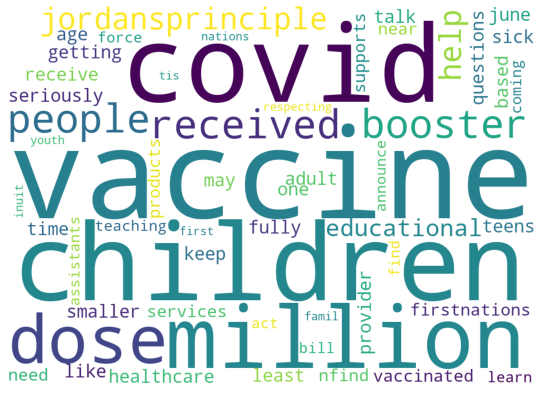

In [ ]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Creating the custom stopwords
customStopwords=list(stopwords_df)

wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

#ARM (Itemsets)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
df = Sample_Tweets
  
#clean tweets
tqdm.pandas()
df["tokenized_tweet"] = df["tweet"].progress_apply(lambda x : clean_tweets(x, stopwords_df))
tokenized_tweets = df["tokenized_tweet"].values.tolist()
te = TransactionEncoder()
te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
df = pd.DataFrame(te_ary, columns=te.columns_)

#Itemsets


min_sup=0.5
frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
print("len of frequent itemsets: ", len(frequent_itemsets.index))

while(len(frequent_itemsets.index)<100):
  min_sup = min_sup/2
  frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
  print("len of frequent itemsets: ", len(frequent_itemsets.index))

itemsets_df = frequent_itemsets[:100] 
print(itemsets_df)
itemsets_df.to_csv("itemsets.csv");
# for username in pharma_username:

  # df = pd.read_csv('/content/drive/MyDrive/Project 2/data/pharma_companies/'+username+'.csv')
  
  #only 10 rows
  # df = df[:10]
  # df = Sample_Tweets

  # #clean tweets
  # tqdm.pandas()
  # df["tokenized_tweet"] = df["tweet"].progress_apply(lambda x : clean_tweets(x, stopwords_df))
  # tokenized_tweets = df["tokenized_tweet"].values.tolist()
  # te = TransactionEncoder()
  # te_ary = te.fit(tokenized_tweets).transform(tokenized_tweets)
  # df = pd.DataFrame(te_ary, columns=te.columns_)

  # #Itemsets
  
  
  # min_sup=0.5
  # frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
  # print("len of frequent itemsets: ", len(frequent_itemsets.index))

  # while(len(frequent_itemsets.index)<100):
  #   min_sup = min_sup/2
  #   frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
  #   print("len of frequent itemsets: ", len(frequent_itemsets.index))

  # itemsets_df = frequent_itemsets[:100] 
  # print(itemsets_df)
  # itemsets_df.to_csv("itemsets.csv");

  

  0%|          | 0/65563 [00:00<?, ?it/s]

len of frequent itemsets:  0
len of frequent itemsets:  8
len of frequent itemsets:  49
len of frequent itemsets:  1029
     support         itemsets
0   0.135946         (canada)
1   0.064655           (caus)
2   0.423059          (covid)
3   0.078444         (effect)
4   0.092034          (everi)
..       ...              ...
95  0.122096   (repli, learn)
96  0.122966    (stop, learn)
97  0.179202  (vaccin, learn)
98  0.067309  (optout, lower)
99  0.067325     (put, lower)

[100 rows x 2 columns]


covid      15
help       13
optout     11
learn      10
everyon     9
repli       9
effect      8
everi       6
stop        6
friday      6
Name: Items, dtype: int64


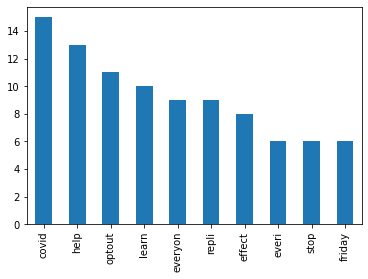

In [ ]:

allItems = []
for i in itemsets_df['itemsets']:
    for j in i:
        allItems.append(j)
        
bar_df = pd.DataFrame(allItems, columns=['Items'])
print(bar_df['Items'].value_counts().head(10))
bar_df['Items'].value_counts().head(10).plot.bar()

In [ ]:
df

a     aa  aackeri  aacvpr  aadncinfopubsaandccanadaca  aadubyk  \
0      False  False    False   False                       False    False   
1      False  False    False   False                       False    False   
2      False  False    False   False                       False    False   
3      False  False    False   False                       False    False   
4      False  False    False   False                       False    False   
...      ...    ...      ...     ...                         ...      ...   
65558  False  False    False   False                       False    False   
65559  False  False    False   False                       False    False   
65560  False  False    False   False                       False    False   
65561  False  False    False   False                       False    False   
65562  False  False    False   False                       False    False   

       aafccanada  aagotii  aaimcloud   aaip  ...  zuzubear  zxatun  zxthix  \
0           False    False      False  False  ...     False   False   False   
1           False    False      False  False  ...     False   False   False   
2           False    False      False  False  ...     False   False   False   
3           False    False      False  False  ...     False   False   False   
4           False    False      False  False  ...     False   False   False   
...           ...      ...        ...    ...  ...       ...     ...     ...   
65558       False    False      False  False  ...     False   False   False   
65559       False    False      False  False  ...     False   False   False   
65560       False    False      False  False  ...     False   False   False   
65561       False    False      False  False  ...     False   False   False   
65562       False    False      False  False  ...     False   False   False   

       zygmunt  zymeerjemison  zytec  zzellera  zzhennan  zzulfiali    zzz  
0        False          False  False     False     False      False  False  
1        False          False  False     False     False      False  False  
2        False          False  False     False     False      False  False  
3        False          False  False     False     False      False  False  
4        False          False  False     False     False      False  False  
...        ...            ...    ...       ...       ...        ...    ...  
65558    False          False  False     False     False      False  False  
65559    False          False  False     False     False      False  False  
65560    False          False  False     False     False      False  False  
65561    False          False  False     False     False      False  False  
65562    False          False  False     False     False      False  False  

[65563 rows x 29901 columns]

    Confidence  Number of rules
0          0.0              142
1          0.1              142
2          0.2              142
3          0.3              140
4          0.4              129
5          0.5              101
6          0.6               80
7          0.7               69
8          0.8               55
9          0.9               46
10         1.0                7


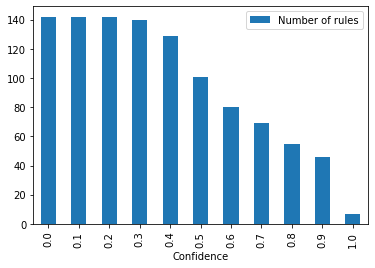

In [ ]:
frequent_itemsets2 = apriori(df, min_support=0.125, use_colnames=True)
frequent_itemsets2

confidence = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
number_of_rules = []

for i in confidence:
    a = association_rules(frequent_itemsets2, metric="confidence", min_threshold=i)
    number_of_rules.append(len(a))

data = {'Confidence': confidence, 'Number of rules': number_of_rules}
df2 = pd.DataFrame(data=data)
print(df2)
plot = df2.plot.bar(x='Confidence', y='Number of rules')

In [ ]:
association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)


antecedents            consequents  antecedent support  \
0            (learn)                (covid)            0.226805   
1               (lt)                (covid)            0.169852   
2            (repli)                (covid)            0.341443   
3            (covid)               (vaccin)            0.423059   
4           (vaccin)                (covid)            0.304135   
..               ...                    ...                 ...   
96    (covid, repli)         (stop, vaccin)            0.193249   
97   (covid, vaccin)          (stop, repli)            0.275735   
98   (repli, vaccin)          (stop, covid)            0.178470   
99           (repli)  (stop, covid, vaccin)            0.341443   
100         (vaccin)   (stop, covid, repli)            0.304135   

     consequent support   support  confidence      lift  leverage  conviction  
0              0.423059  0.194988    0.859718  2.032147  0.099036    4.112712  
1              0.423059  0.169654    0.998833  2.360979  0.097796  494.216762  
2              0.423059  0.193249    0.565979  1.337825  0.048799    1.329293  
3              0.304135  0.275735    0.651765  2.143012  0.147068    1.998262  
4              0.423059  0.275735    0.906620  2.143012  0.147068    6.178415  
..                  ...       ...         ...       ...       ...         ...  
96             0.175770  0.174519    0.903078  5.137844  0.140552    8.504068  
97             0.224929  0.174519    0.632924  2.813887  0.112498    2.111474  
98             0.178805  0.174519    0.977865  5.468888  0.142608   37.099619  
99             0.175709  0.174519    0.511123  2.908920  0.114525    1.686091  
100            0.174519  0.174519    0.573821  3.288014  0.121442    1.936937  

[101 rows x 9 columns]

#ARM (Rules)

In [ ]:
matrix_df = pd.DataFrame(columns=['Threshold Support', 'Threshold Confidence', 'Count of rules'])
for min_support_initialize in np.arange(0.125, 0.5, 0.0625):
  for min_threshold_initialize in np.arange(0.5, 1, 0.2):
    frequent_itemsets_temp = apriori(df, min_support=min_support_initialize, use_colnames=True)

    rules = association_rules(frequent_itemsets_temp, metric="confidence", min_threshold=min_threshold_initialize)
  # rules = rules.sort_values(by='confidence', ascending =False)
  # print(rules)
    matrix_df.loc[len(matrix_df.index)] = [min_support_initialize, min_threshold_initialize, len(rules.index)] 
  
print(matrix_df)

    Threshold Support  Threshold Confidence  Count of rules
0              0.1250                   0.5           101.0
1              0.1250                   0.7            69.0
2              0.1250                   0.9            46.0
3              0.1875                   0.5            10.0
4              0.1875                   0.7             4.0
5              0.1875                   0.9             1.0
6              0.2500                   0.5             6.0
7              0.2500                   0.7             3.0
8              0.2500                   0.9             1.0
9              0.3125                   0.5             0.0
10             0.3125                   0.7             0.0
11             0.3125                   0.9             0.0
12             0.3750                   0.5             0.0
13             0.3750                   0.7             0.0
14             0.3750                   0.9             0.0
15             0.4375                   

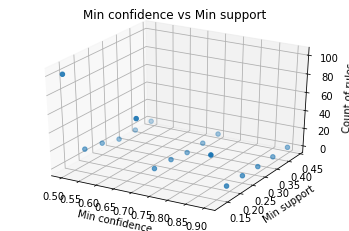

In [ ]:
from IPython.core.pylabtools import figsize
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining all 3 axes
z = matrix_df['Count of rules']
x = matrix_df['Threshold Confidence']
y = matrix_df['Threshold Support']

# plotting
ax.scatter(x, y, z)
ax.set_title('Min confidence vs Min support')
ax.set_xlabel('Min confidence')
ax.set_ylabel('Min support')
ax.set_zlabel('Count of rules')
plt.show()


In [ ]:
# 0              0.1250                   0.5           101.0
frequent_itemsets_temp = apriori(df, min_support=0.125, use_colnames=True)

rules = association_rules(frequent_itemsets_temp, metric="confidence", min_threshold=0.5)
rules[rules['lift']>=1]
print(rules)

         antecedents            consequents  antecedent support  \
0            (learn)                (covid)            0.226805   
1               (lt)                (covid)            0.169852   
2            (repli)                (covid)            0.341443   
3            (covid)               (vaccin)            0.423059   
4           (vaccin)                (covid)            0.304135   
..               ...                    ...                 ...   
96    (covid, repli)         (stop, vaccin)            0.193249   
97   (covid, vaccin)          (stop, repli)            0.275735   
98   (repli, vaccin)          (stop, covid)            0.178470   
99           (repli)  (stop, covid, vaccin)            0.341443   
100         (vaccin)   (stop, covid, repli)            0.304135   

     consequent support   support  confidence      lift  leverage  conviction  
0              0.423059  0.194988    0.859718  2.032147  0.099036    4.112712  
1              0.423059  0.169654  

In [ ]:
type(rules)

pandas.core.frame.DataFrame

In [ ]:
df1 = (rules.explode('antecedents')
         .reset_index(drop=True)
         .explode('consequents')
         .reset_index(drop=True))
df1.to_csv('rules.csv')

#Bokeh plot

In [ ]:
import pandas as pd
import networkx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bokeh.io import output_notebook, show, save

In [ ]:
got_df = pd.read_csv('/content/rules.csv')

In [ ]:
G = networkx.from_pandas_edgelist(got_df, 'antecedents', 'consequents')

In [ ]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

In [ ]:
#Choose a title!
title = 'Bokeh plot'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)


In [ ]:
save(plot, filename=f"{title}.html")

/usr/local/lib/python3.7/dist-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/usr/local/lib/python3.7/dist-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/content/Bokeh plot.html'

#Followers (Maybe not)

In [ ]:
# !pip install -U -qq tweepy

In [ ]:
import tweepy

In [ ]:
# Initialize bearer token and client
bearer_token = "AAAAAAAAAAAAAAAAAAAAAD2hVAEAAAAAjBhkrfvf%2BEftzMPhDJt1oXHLCh4%3D0J5mIvBgW81rnqoNcUXOFMOCqv83ANsZZoELvCvxAYiYnUm4Ql"
client = tweepy.Client(bearer_token=bearer_token)

AttributeError: ignored

In [ ]:
def getUserInfo(client,username):
    user = client.get_user(username=username,user_fields='public_metrics')
    return user


d =getUserInfo(client,'pfizer')

d.data.public_metrics['followers_count']

In [ ]:
client.get_users_followers(id=56488059, max_results=100)

In [ ]:
def getTargetFollowers(n=100, m=150):
  screen_name = 'JoeBiden'
  target_followers = list()
  n = m
  f = tweepy.Cursor(api.get_followers(), screen_name).items(n)
  for fol in f:
    if not fol.protected:
      target_followers.append(fol.screen_name)
    if len(target_followers) == n:
      break
  print(len(target_followers))
  dff = pd.DataFrame(columns=target_followers)
  print(dff.shape)
  return(dff)

#Metrics
Recommender systems can also profit from the messages shared on social media 

The higher the popularity of a tweet, the more likely it is to contain higly supported association rule.




In [ ]:
Sample_Tweets['Tweet_rank'] = Sample_Tweets['like_count']+Sample_Tweets['quote_count']+Sample_Tweets['reply_count']+Sample_Tweets['retweet_count']

In [ ]:
Sample_Tweets = Sample_Tweets.sort_values(by=['Tweet_rank'], ascending=False)


In [ ]:
Sample_Tweets["tokenized_tweet"] = Sample_Tweets["tweet"].progress_apply(lambda x : clean_tweets(x, stopwords_df))


  0%|          | 0/65563 [00:00<?, ?it/s]

In [ ]:
Sample_Tweets

id                 created_at      conversation_id  \
3040   1392911350058323973  2021-05-13 18:35:19+00:00  1392911350058323973   
7998   1429802487045832707  2021-08-23 13:47:32+00:00  1429802487045832707   
6840   1246243351503962113  2020-04-04 01:09:03+00:00  1246243351503962113   
2473   1420104200957038594  2021-07-27 19:30:00+00:00  1420104200957038594   
7111   1232431332220784640  2020-02-25 22:25:01+00:00  1232431332220784640   
...                    ...                        ...                  ...   
33518  1413555189378863106  2021-07-09 17:46:34+00:00  1410267121192517634   
33519  1413555165387530240  2021-07-09 17:46:28+00:00  1410267121192517634   
33520  1413555138925670402  2021-07-09 17:46:22+00:00  1410267121192517634   
33522  1413554689975717891  2021-07-09 17:44:35+00:00  1412018651755130884   
32781  1413590262899744772  2021-07-09 20:05:56+00:00  1413590262899744772   

                                                   tweet  retweet_count  \
3040   UPDATE: If you are fully vaccinated against #C...          23551   
7998   RT @US_FDA: Today, FDA approved the first COVI...          53240   
6840   #DYK? CDC’s recommendation on wearing a cloth ...          13288   
2473   #DeltaVariant surging in U.S. New data show De...          12222   
7111   There is currently no reported community sprea...           7257   
...                                                  ...            ...   
33518  @LL201911 @CitImmCanada (3/6) Currently, those...              0   
33519  @LL201911 @CitImmCanada (2/6) To meet the vacc...              0   
33520  @LL201911 @CitImmCanada (1/6) Hi, proof of vac...              0   
33522  @markdigal2 (2/2) For more information on trav...              0   
32781  @badCat_itAgain Even in a pandemic, nothing br...              0   

       like_count  reply_count  quote_count  \
3040        51294        10783        27363   
7998            0            0            0   
6840        21583         2707         4080   
2473        15996         8985         3666   
7111        17067         1720          989   
...           ...          ...          ...   
33518           0            0            0   
33519           0            0            0   
33520           0            0            0   
33522           0            0            0   
32781           0            0            0   

                                            expanded_url language  \
3040                              https://bit.ly/3btJaFU       en   
7998                                                 NaN       en   
6840                              https://bit.ly/2Ravt42       en   
2473                      http://www.cdc.gov/coronavirus       en   
7111                          http://www.cdc.gov/COVID19       en   
...                                                  ...      ...   
33518                                                NaN       en   
33519                                                NaN       en   
33520                                                NaN       en   
33522  https://travel.gc.ca/travel-covid/travel-restr...       en   
32781                                                NaN       en   

       possibly_sensitive  in_reply_to_user_id      username  \
3040                False                  NaN        CDCgov   
7998                False                  NaN        IHSgov   
6840                False                  NaN        CDCgov   
2473                False                  NaN        CDCgov   
7111                False                  NaN        CDCgov   
...                   ...                  ...           ...   
33518               False         1.169271e+18  GovCanHealth   
33519               False         1.169271e+18  GovCanHealth   
33520               False         1.169271e+18  GovCanHealth   
33522               False         1.232355e+18  GovCanHealth   
32781               False         1.284373e+18  GovCanHealth   

                       

In [ ]:
Sample_Tweets["tokenized_tweet"]

3040     [updat, fulli, vaccin, covid, resum, activ, wi...
7998     [usfda, today, fda, approv, first, covid, vacc...
6840     [dyk, cdc, recommend, wear, cloth, face, cover...
2473     [deltavari, surg, us, new, data, show, delta, ...
7111     [current, report, commun, spread, covid, us, p...
                               ...                        
33518    [citimmcanada, current, vaccin, manufactur, pf...
33519    [citimmcanada, meet, vaccin, criteria, travel,...
33520    [citimmcanada, hi, proof, vaccin, requir, ente...
33522               [markdig, inform, travel, canada, air]
32781    [badcatitagain, even, pandem, noth, bring, peo...
Name: tokenized_tweet, Length: 65563, dtype: object

In [ ]:
type(Sample_Tweets['tokenized_tweet'])

pandas.core.series.Series

In [ ]:
sorted_df = Sample_Tweets['tokenized_tweet']

In [ ]:
sorted_df.to_csv('sorted.csv')

In [ ]:
Sample_Tweets.iloc[81]['tweet']

"It's normal to have questions when something is new. ❤️ this tweet to receive COVID-19 vaccine information every week. 😷🏥 &lt;https://t.co/CLacKmtd7K&gt; Reply #stop to unsubscribe. https://t.co/BWh7SAgoFe"

In [ ]:
rules['rank'] = rules['antecedent support']+rules['confidence']+rules['consequent support']+rules['leverage']+rules['lift']+rules['support']+rules['conviction']

In [ ]:
sorted_rules = rules.sort_values(by=['rank'], ascending=False)

In [ ]:
sorted_rules

antecedents     consequents  antecedent support  \
91  (stop, repli, vaccin)         (covid)            0.174519   
41        (optout, covid)         (repli)            0.140674   
69       (optout, vaccin)         (repli)            0.125986   
78    (lt, vaccin, learn)         (covid)            0.169333   
37           (lt, vaccin)         (covid)            0.169410   
..                    ...             ...                 ...   
62         (optout, stop)         (repli)            0.304562   
23                (repli)        (vaccin)            0.341443   
25               (vaccin)          (stop)            0.304135   
65                (repli)  (optout, stop)            0.341443   
2                 (repli)         (covid)            0.341443   

    consequent support   support  confidence      lift  leverage  conviction  \
91            0.423059  0.174519    1.000000  2.363738  0.100687         inf   
41            0.341443  0.140674    1.000000  2.928750  0.092642         inf   
69            0.341443  0.125986    1.000000  2.928750  0.082969         inf   
78            0.423059  0.169333    1.000000  2.363738  0.097695         inf   
37            0.423059  0.169410    1.000000  2.363738  0.097739         inf   
..                 ...       ...         ...       ...       ...         ...   
62            0.341443  0.172475    0.566306  1.658569  0.068485    1.518484   
23            0.304135  0.178470    0.522693  1.718621  0.074625    1.457898   
25            0.363025  0.175770    0.577934  1.591995  0.065361    1.509183   
65            0.304562  0.172475    0.505137  1.658569  0.068485    1.405315   
2             0.423059  0.193249    0.565979  1.337825  0.048799    1.329293   

        rank  
91       inf  
41       inf  
69       inf  
78       inf  
37       inf  
..       ...  
62  4.630324  
23  4.597883  
25  4.587403  
65  4.455986  
2   4.239646  

[101 rows x 10 columns]

In [ ]:
type(sorted_rules['antecedents'])

pandas.core.series.Series

#Accuracy

Compare sorted_rules['antecedents']+sorted_rules['consequents]' with Sample_tweets['tokenized_tweet'] using iloc

In [ ]:
type(list(sorted_rules.iloc[0]['antecedents']))

list

In [ ]:
count=0
l1 = list(sorted_rules.iloc[0]['antecedents'])
for value in l1:
  if value in sorted_df.iloc[0]:
    count=count+1
l2 = list(sorted_rules.iloc[0]['consequents'])
if(count==len(l1)):
  for value in l2:
    if value in sorted_df.iloc[0]:
      count=count+1
if(count==len(l1)+len(l2)):
  print("exists")
else:
  print("does not exist")

exists


In [ ]:
len(sorted_rules.index)

101

In [ ]:
len(sorted_df.index)

65563

In [ ]:
counter=0

save_df = pd.DataFrame(columns=['Tweet ID (iloc)', 'tweet', 'tokenized', 'Rule No.', 'rule', 'Exists'])
# matrix_df.loc[len(matrix_df.index)] = [min_support_initialize, min_threshold_initialize, len(rules.index)] 
for i in range (0, 100, 1):
  for j in range(0, 101, 1):
    count=0
    l1 = list(sorted_rules.iloc[j]['antecedents'])
    for value in l1:
      if value in sorted_df.iloc[i]:
        count=count+1
    l2 = list(sorted_rules.iloc[j]['consequents'])
    if(count==len(l1)):
      for value in l2:
        if value in sorted_df.iloc[i]:
          count=count+1
    if(count==len(l1)+len(l2)):
      save_df.loc[len(save_df.index)] = [i, Sample_Tweets.iloc[i]['tweet'], Sample_Tweets.iloc[i]["tokenized_tweet"], j, list(sorted_rules.iloc[j]['antecedents'])+list(sorted_rules.iloc[j]['consequents']), 1]
      # print("Tweet ", i, " contains rule number ", j)
      counter=counter+1 
# for i in range(0, 5, 1):
#   for j in range(0, 75798, 1):
#     count=0
#     l1 = list(sorted_rules.iloc[j]['antecedents'])
#     for value in l1:
#       if value in sorted_df.iloc[i]:
#         count=count+1
#     l2 = list(sorted_rules.iloc[j]['consequents'])
#     if(count==len(l1)):
#       for value in l2:
#         if value in sorted_df.iloc[i]:
#           count=count+1
#     if(count==len(l1)+len(l2)):
#       print(j, " exists at ", i)
#       counter=counter+1
#     else:
#       print("does not exist")

In [ ]:
save_df

Tweet ID (iloc)                                              tweet  \
0                 0  UPDATE: If you are fully vaccinated against #C...   
1                 0  UPDATE: If you are fully vaccinated against #C...   
2                 1  RT @US_FDA: Today, FDA approved the first COVI...   
3                 1  RT @US_FDA: Today, FDA approved the first COVI...   
4                 3  #DeltaVariant surging in U.S. New data show De...   
..              ...                                                ...   
133              92  CDC recommends that certain populations receiv...   
134              93  Children can spread #COVID19, even when they h...   
135              94  COMIRNATY/Pfizer-BioNTech #COVID19 vaccine rec...   
136              94  COMIRNATY/Pfizer-BioNTech #COVID19 vaccine rec...   
137              98  #HCP: Protect yourself and others from #COVID1...   

                                             tokenized Rule No.  \
0    [updat, fulli, vaccin, covid, resum, activ, wi...       48   
1    [updat, fulli, vaccin, covid, resum, activ, wi...       76   
2    [usfda, today, fda, approv, first, covid, vacc...       48   
3    [usfda, today, fda, approv, first, covid, vacc...       76   
4    [deltavari, surg, us, new, data, show, delta, ...       48   
..                                                 ...      ...   
133  [cdc, recommend, certain, popul, receiv, boost...       76   
134  [children, spread, covid, even, mild, symptom,...       54   
135  [comirnatypfizerbiontech, covid, vaccin, recei...       48   
136  [comirnatypfizerbiontech, covid, vaccin, recei...       76   
137  [hcp, protect, other, covid, follow, facemask,...       54   

                rule Exists  
0    [vaccin, covid]      1  
1    [covid, vaccin]      1  
2    [vaccin, covid]      1  
3    [covid, vaccin]      1  
4    [vaccin, covid]      1  
..               ...    ...  
133  [covid, vaccin]      1  
134   [learn, covid]      1  
135  [vaccin, covid]      1  
136  [covid, vaccin]      1  
137   [learn, covid]      1  

[138 rows x 6 columns]

In [ ]:
counter

138

In [ ]:
save_df.to_csv('final.csv')

In [ ]:
counter_0to20=0
counter_21to40=0
counter_41to60=0
counter_61to80=0
counter_81to100=0

i=0
for index, row in save_df.iterrows():
  if(row['Tweet ID (iloc)'])<=20:
    counter_0to20=counter_0to20+1
  elif(row['Tweet ID (iloc)'])<=40:
    counter_21to40=counter_21to40+1
  elif(row['Tweet ID (iloc)'])<=60:
    counter_41to60=counter_41to60+1
  elif(row['Tweet ID (iloc)'])<=80:
    counter_61to80=counter_61to80+1
  else: 
    counter_81to100=counter_81to100+1

In [ ]:
print(counter_0to20, " ", counter_21to40, " ", counter_41to60, " ", counter_61to80, " ", counter_81to100)

12   33   12   18   63
